In [35]:
! pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import random
import time

In [37]:
class GridEnvironment(gym.Env):
    
    def __init__(self, rows=4, cols=4):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.rows = int(rows)
        self.columns = int(cols)
        self.qtable = self.initialise_qtable()
        actions_available = [0,1,2,3]
      
    def initialise_qtable(self):
        qtable = {}
        for i in range(self.rows):
          for j in range(self.columns):
            qtable[(i,j)] = np.zeros(4)
        return qtable

    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [2, 2]
        self.rew_pos1 = [3, 1]
        self.rew_pos2 = [2, 1]
        self.rew_pos3 = [3, 0]
        self.rew_pos4 = [1, 1]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 1
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)

    def next_action(self, epsilon):
      actions_available = [0,1,2,3]
      ran = np.random.random()
      if  ran > epsilon:
          action = np.argmax(self.qtable[tuple(self.agent_pos)])
      else:
          action = np.random.choice(actions_available)
      return action

    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)      
        if action == 0:
            a = np.random.choice([0, 2, 3], p=[0.8, 0.1, 0.1])
            if a == 0:
              self.agent_pos[0] += 1
            elif a == 2:
              self.agent_pos[1] += 1
            elif a == 3:
              self.agent_pos[1] -= 1
        if action == 1:
            b = np.random.choice([1, 2, 3], p=[0.8, 0.1, 0.1])
            if b ==1:
              self.agent_pos[0] -= 1
            elif b == 2:
              self.agent_pos[1] += 1
            elif b == 3:
              self.agent_pos[1] -= 1
        if action == 2:
            c = np.random.choice([2, 1, 0], p=[0.8, 0.1, 0.1])
            if c == 2:
              self.agent_pos[1] += 1
            elif c == 0:
              self.agent_pos[0] += 1
            elif c == 1:
              self.agent_pos[0] -= 1
        if action == 3:
            d = np.random.choice([3, 1, 0], p=[0.8, 0.1, 0.1])
            if d == 3:
              self.agent_pos[1] -= 1
            elif d == 0:
              self.agent_pos[0] += 1
            elif d == 1:
              self.agent_pos[0] -= 1
            
        self.agent_pos = np.clip(self.agent_pos, 0, 2)
        self.state = np.zeros((4,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 1
        observation = self.state.flatten()

        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 10
        elif (self.agent_pos == self.rew_pos1).all():
            reward = 1
        elif (self.agent_pos == self.rew_pos2).all():
            reward = 3
        elif (self.agent_pos == self.rew_pos3).all():
            reward = 5
        elif (self.agent_pos == self.rew_pos4).all():
            reward = 7

        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False

        info = {}

        return observation, reward, done, info

In [38]:
env = GridEnvironment()

Episode:  10
Reward:  0
Episode:  10
Reward:  0
Episode:  10
Reward:  0
Episode:  10
Reward:  0
Episode:  10
Reward:  0
Episode:  10
Reward:  0
Episode:  10
Reward:  0
Episode:  10
Reward:  10
Episode:  10
Reward:  20
Episode:  10
Reward:  20
Episode:  20
Reward:  0
Episode:  20
Reward:  0
Episode:  20
Reward:  0
Episode:  20
Reward:  7
Episode:  20
Reward:  7
Episode:  20
Reward:  14
Episode:  20
Reward:  14
Episode:  20
Reward:  24
Episode:  20
Reward:  27
Episode:  20
Reward:  37
Episode:  30
Reward:  0
Episode:  30
Reward:  7
Episode:  30
Reward:  10
Episode:  30
Reward:  10
Episode:  30
Reward:  13
Episode:  30
Reward:  23
Episode:  30
Reward:  33
Episode:  30
Reward:  43
Episode:  30
Reward:  46
Episode:  30
Reward:  53
Episode:  40
Reward:  0
Episode:  40
Reward:  0
Episode:  40
Reward:  0
Episode:  40
Reward:  7
Episode:  40
Reward:  10
Episode:  40
Reward:  20
Episode:  40
Reward:  30
Episode:  40
Reward:  40
Episode:  40
Reward:  50
Episode:  40
Reward:  60
Episode:  50
Rewar

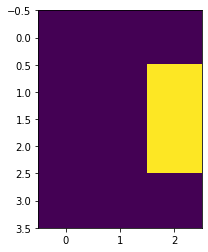

In [41]:
obs = env.reset()
episode = 100
learning_rate = 0.1
discount_rate = 0.9
epsilon = 1.0
decay_rate= (0.01) ** (1/episode)
reward_per_episode = []
render_break = 10
epsilon_decay = []

max_timesteps = 100
for timestep in range(1, 101):
    epsilon_decay.append(epsilon)
    render = True if timestep % render_break == 0 else False 
    done = False
    reward = 0 
    cumulative_reward = 0
    obs = env.reset()

    while not done:
        agent_current_position = env.agent_pos.copy()
        action = env.next_action(epsilon)
        observation, reward, done, info = env.step(action)
        cumulative_reward+=reward
        env.qtable[tuple(agent_current_position)][action] = env.qtable[tuple(agent_current_position)][action] + learning_rate * (reward + discount_rate * np.max(env.qtable[tuple(env.agent_pos)]) - env.qtable[tuple(agent_current_position)][action])
        if render:
            env.render()
            print("Episode: ", timestep)
            print("Reward: ", cumulative_reward)

    epsilon *= decay_rate
    reward_per_episode.append(cumulative_reward)

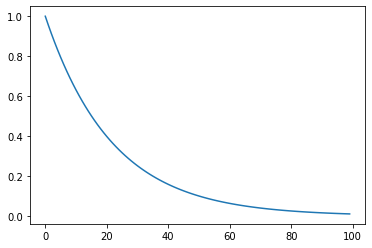

In [42]:
plt.plot(epsilon_decay, label = "Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay in Q-learning - Stochaistic Environment")
plt.show()

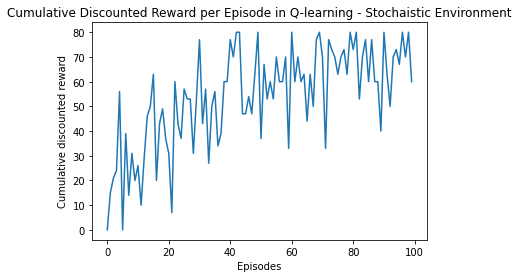

In [52]:
plt.plot(reward_per_episode, label = "Rewards per episode")
plt.xlabel("Episodes")
plt.ylabel("Cumulative discounted reward")
plt.title("Cumulative Discounted Reward per Episode in Q-learning - Stochaistic Environment")
plt.show()

In [44]:
env_sarsa = GridEnvironment(rows=4, cols=4)

Episode:  10
Reward:  0
Episode:  10
Reward:  7
Episode:  10
Reward:  7
Episode:  10
Reward:  7
Episode:  10
Reward:  7
Episode:  10
Reward:  14
Episode:  10
Reward:  17
Episode:  10
Reward:  24
Episode:  10
Reward:  27
Episode:  10
Reward:  34
Episode:  20
Reward:  0
Episode:  20
Reward:  7
Episode:  20
Reward:  10
Episode:  20
Reward:  17
Episode:  20
Reward:  20
Episode:  20
Reward:  27
Episode:  20
Reward:  30
Episode:  20
Reward:  30
Episode:  20
Reward:  30
Episode:  20
Reward:  37
Episode:  30
Reward:  0
Episode:  30
Reward:  7
Episode:  30
Reward:  7
Episode:  30
Reward:  17
Episode:  30
Reward:  27
Episode:  30
Reward:  37
Episode:  30
Reward:  47
Episode:  30
Reward:  57
Episode:  30
Reward:  57
Episode:  30
Reward:  57
Episode:  40
Reward:  0
Episode:  40
Reward:  0
Episode:  40
Reward:  0
Episode:  40
Reward:  7
Episode:  40
Reward:  10
Episode:  40
Reward:  17
Episode:  40
Reward:  17
Episode:  40
Reward:  24
Episode:  40
Reward:  24
Episode:  40
Reward:  34
Episode:  50
R

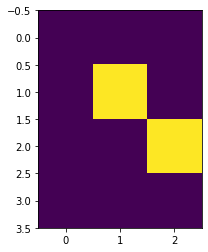

In [45]:
obs1 = env_sarsa.reset()
episode = 100
learning_rate = 0.1
discount_rate = 0.9
epsilon = 1.0
decay_rate= (0.01) ** (1/episode)
number_of_iterations_sarsa = []
reward_per_episode_sarsa = []
render_break = 10
epsilon_decay = []

max_timesteps = 100
for timestep in range(1, 101):
    epsilon_decay.append(epsilon)
    render = True if timestep % render_break == 0 else False 
    done = False
    reward = 0 
    obs1 = env_sarsa.reset()
    agent_old_action = env_sarsa.next_action(epsilon)
    cumulative_reward = 0
    

    while not done:
        agent_old_position = env_sarsa.agent_pos.copy()
        observation, reward, done, info = env_sarsa.step(agent_old_action)
        cumulative_reward+=reward
        new_action = env_sarsa.next_action(epsilon)
        env_sarsa.qtable[tuple(agent_old_position)][agent_old_action] = env_sarsa.qtable[tuple(agent_old_position)][agent_old_action] + learning_rate * (reward + discount_rate * (env_sarsa.qtable[tuple(env_sarsa.agent_pos)][new_action]) - env_sarsa.qtable[tuple(agent_old_position)][agent_old_action])
        agent_old_action = new_action
        if render:
          print("Episode: ", timestep)
          print("Reward: ", cumulative_reward)
          env_sarsa.render()

    epsilon *= decay_rate
    reward_per_episode_sarsa.append(cumulative_reward)   

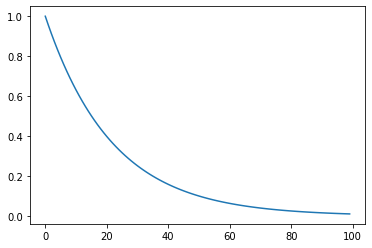

In [46]:
plt.plot(epsilon_decay, label = "Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon decay in SARSA - Stochaistic Environment")
plt.show()

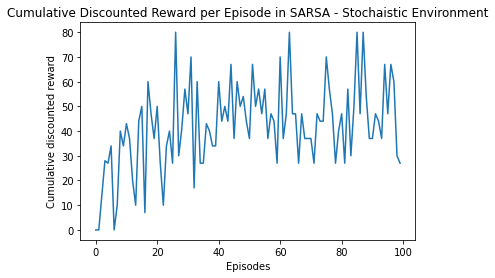

In [51]:
plt.plot(reward_per_episode_sarsa, label = "Rewards per episode")
plt.xlabel("Episodes")
plt.ylabel("Cumulative discounted reward")
plt.title("Cumulative Discounted Reward per Episode in SARSA - Stochaistic Environment")
plt.show()

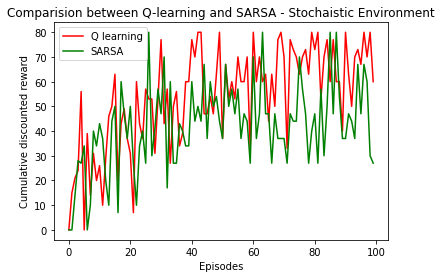

In [50]:
plt.plot(reward_per_episode, color='r', label='Q learning')
plt.plot(reward_per_episode_sarsa, color='g', label='SARSA')
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Cumulative discounted reward")
plt.title("Comparision between Q-learning and SARSA - Stochaistic Environment")
plt.show()